# Loading Data

Baixe sua base de dados de http://ninfa.inf.ufes.br/RPDBCS3/data/

In [1]:
from rpdbcs.datahandler.dataset import readDataset
from rpdbcs.datahandler.dataview import plotSpectrum

ROOT_DIR = '/home/lhsmello/ufes/NINFA/lmello_RPDBCS3/data/data_classified_v6'
D = readDataset(ROOT_DIR+'/freq.csv', ROOT_DIR+'/labels.csv',
                remove_first=100, nsigs=300, npoints=10800)
# print(D.asDataFrame()['real_rotation_hz'].values.min())
D.normalize(37.28941975);

Normalizing Data...


# Loading TripletNet

In [4]:
from tripletnet.classifiers.augmented_classifier import EmbeddingWrapper
embedder = EmbeddingWrapper.loadModel('5feats_tripletspace.pt')
embedder.embedding_net.eval();# evaluation mode. Do not activate if you want to train

# Running TripletNet

In [11]:
signal = D.getSignal(0)

triplet_feats = embedder.embed([signal.freq.getY()[:6100]])[0]
print(triplet_feats)

[ 0.04186734  0.22520979 -0.11225035  0.02037195  0.03217574]


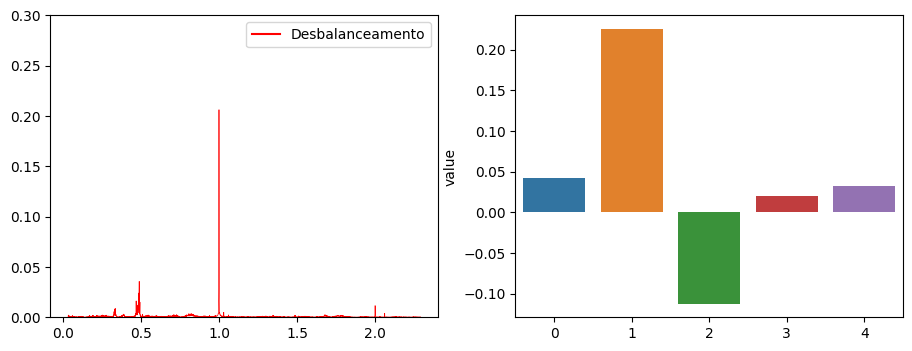

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [11, 4]

plt.subplot(1,2,1)
plotSpectrum(signal)

df = pd.DataFrame({'value': triplet_feats})
plt.subplot(1,2,2)
sns.barplot(data=df, x=df.index, y='value');


A rede neural usada se encontra no atributo de **EmbeddingWrapper**. Para mais detalhes sobre a arquitetura, veja a classe **tripletnet.networks.lmelloEmbeddingNet2**

In [4]:
embedder.embedding_net

lmelloEmbeddingNet2(
  (convnet): Sequential(
    (0): Conv1d(1, 16, kernel_size=(5,), stride=(1,))
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (4): Conv1d(16, 32, kernel_size=(5,), stride=(1,))
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (8): Conv1d(32, 64, kernel_size=(5,), stride=(1,))
    (9): ReLU()
    (10): Dropout(p=0.2, inplace=False)
    (11): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=6016, out_features=192, bias=True)
    (1): ReLU()
    (2): Linear(in_features=192, out_features=5, bias=True)
  )
)